In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_bphebb import SimpleNeuralNetwork
from tqdm.notebook import tqdm

In [8]:
# load the pickle file
with open('perturbation_exp_result.pkl', 'rb') as f:
    perturb_lasts = pickle.load(f)
    all_simu_losses = pickle.load(f)
    all_gain_changes = pickle.load(f)
    all_shift_changes = pickle.load(f)
    all_weight_sums = pickle.load(f)
simu_epochs = 3000

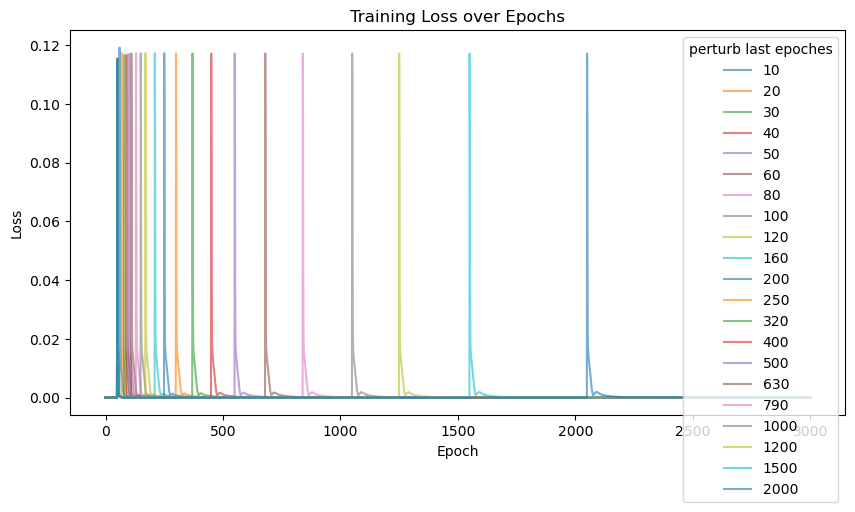

In [10]:
# Plotting the loss
fig, ax = plt.subplots(figsize=(10, 5))
for i, simu_losses in enumerate(all_simu_losses):
    plt.plot(range(simu_epochs), simu_losses, label=perturb_lasts[i], alpha=0.6)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0,0.02])
# plt.xlim([0,200])
plt.title('Training Loss over Epochs')
plt.legend(title='perturb last epoches')
# plt.savefig('fig/0122_abb05_perturb_loss.png')
plt.show()

In [11]:
recover_costs = []
recover_epochs = []
for k in range(len(all_simu_losses)):
    simu_losses = all_simu_losses[k]
    perturb_last = perturb_lasts[k]
    perturb_start = 50
    origin_start = perturb_start + perturb_last

    recover_cost = 0
    recover_epoch = 0
    for i, loss in enumerate(simu_losses):
        if i > origin_start:
            if loss < 0.0001:
                break
            if loss < 1:
                recover_cost += loss
                recover_epoch += 1

    print(recover_cost)
    print(recover_epoch)
    recover_costs.append(recover_cost)
    recover_epochs.append(recover_epoch)

0.2826643111984595
67
0.3099777364404872
86
0.33038828839198686
112
0.3475359486765228
170
0.3618094699268113
200
0.3665014840007643
209
0.3729344259118079
217
0.3774239805425168
209
0.3823088626304525
215
0.3876210982198245
230
0.39297139848349616
222
0.4009037382056704
241
0.4049530028569279
235
0.41122258646646515
263
0.41454948311002227
239
0.4193846377165755
250
0.42459001296083443
258
0.42347905845963396
242
0.42281635306426324
228
0.42754407608299516
252
0.42670107552112313
243


Text(0.5, 1.0, 'Gain Change over Epochs')

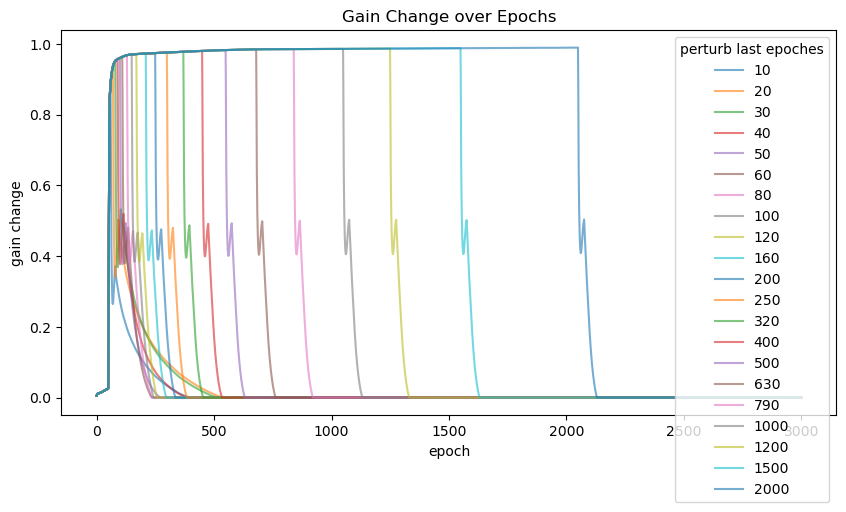

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, gain_changes in enumerate(all_gain_changes):
    plt.plot(np.arange(simu_epochs), gain_changes, label=perturb_lasts[i], alpha=0.6)
plt.xlabel("epoch")
plt.ylabel("gain change")
plt.legend(title='perturb last epoches')
plt.title('Gain Change over Epochs')
# plt.savefig('fig/0122_abb05_perturb_gc.png')

Text(0.5, 1.0, 'Shift Change over Epochs')

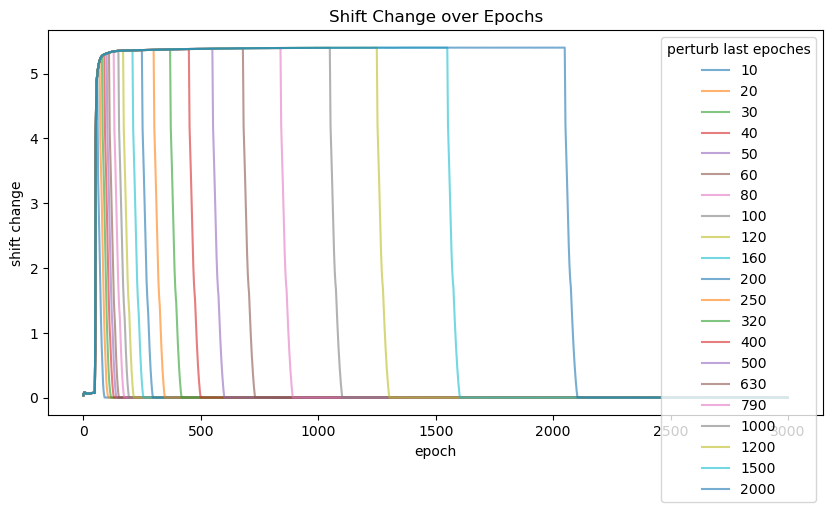

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, shift_changes in enumerate(all_shift_changes):
    plt.plot(np.arange(simu_epochs), shift_changes, label=perturb_lasts[i], alpha=0.6)
plt.xlabel("epoch")
plt.ylabel("shift change")
plt.legend(title='perturb last epoches')
plt.title('Shift Change over Epochs')
# plt.savefig('fig/0122_abb05_perturb_sc.png')

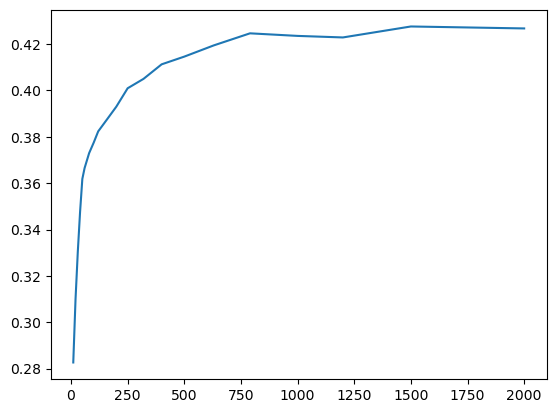

In [13]:
plt.plot(perturb_lasts, recover_costs)

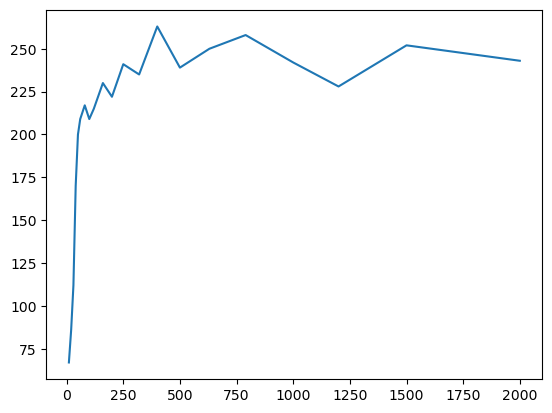

In [14]:
plt.plot(perturb_lasts, recover_epochs)